# <div align="center"> Conception d'une application au service de la santé publique </div>

<font size = 4 pt> Après avoir nettoyé le jeux de donnée et sélectionné les variables pertinentes, nous allons explorer les données en effectuant des analyses uni-variées,bi-variées, multivariée, ainsi qu'une réduction dimensionnelle.  

## Etape 1 : Importer les différentes librairies et le jeu de donnée

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)

## Etape 2 : Observation générale du jeu de donnée 

In [2]:
DF = pd.read_csv('Dataset_clean.csv',delimiter='\t',encoding='UTF-8', low_memory=False)
DF.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639088 entries, 0 to 639087
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   code                                                    639088 non-null  object 
 1   last_modified_datetime                                  639088 non-null  object 
 2   countries                                               639088 non-null  object 
 3   url                                                     639088 non-null  object 
 4   created_datetime                                        639088 non-null  object 
 5   creator                                                 639087 non-null  object 
 6   pnns_groups_2                                           639088 non-null  object 
 7   pnns_groups_1                                           639088 non-null  object 
 8   product_name            

In [3]:
print('le dataset comporte {} lignes et {} variables'.format(DF.shape[0],DF.shape[1]))
DF.sample(2)

le dataset comporte 639088 lignes et 29 variables


code last_modified_datetime countries  \
44735        05818563    2021-03-14 18:47:44     en:fr   
353093  3597680001450    2021-03-11 10:23:21    France   

                                                      url  \
44735   http://world-en.openfoodfacts.org/product/0581...   
353093  http://world-en.openfoodfacts.org/product/3597...   

           created_datetime  creator    pnns_groups_2  \
44735   2021-03-14 18:37:39  kiliweb          unknown   
353093  2020-04-11 14:40:59  kiliweb  Milk and yogurt   

                  pnns_groups_1               product_name  \
44735                   unknown  Crème légère semi épaisse   
353093  Milk and dairy products           Lait demi écrémé   

        saturated-fat_100g  sugars_100g  proteins_100g  fat_100g  \
44735                 12.0          4.2            2.8      18.0   
353093                 1.0          4.8            3.2       1.6   

        carbohydrates_100g  salt_100g  energy-kcal_100g       brands  \
44735                 60.0       0.13             816.0          NaN   
353093                 4.8       0.10             195.0  Ets Leconte   

        nutrition_score_100g            labels  Nb_additifs_100g  \
44735                    NaN               NaN               NaN   
353093                   2.0  fr:Saveurs en Or               NaN   

        fruits_vegetables_nuts_\nestimate_from_ingredients_100g  \
44735                                                 NaN         
353093                                                NaN         

        nova_group_scoring  fiber_100g  nutriscore_scoring  \
44735                  NaN         NaN                 NaN   
353093                 NaN         NaN                 2.0   

        nb_ingredients_100g  Nb_ingrédients_scoring  bio_scoring  \
44735                   NaN                     NaN          NaN   
353093                  NaN                     NaN          4.0   

        additifs_scoring  ecolo_scoring  
44735                NaN            NaN  
353093               NaN            NaN

In [4]:
DF.describe()

saturated-fat_100g    sugars_100g  proteins_100g       fat_100g  \
count       631562.000000  632770.000000  634050.000000  632235.000000   
mean             5.395239      13.854388       9.072455      13.723165   
std              7.580804      19.890630       9.914589      15.879632   
min              0.000000       0.000000       0.000000       0.000000   
25%              0.300000       0.700000       1.870000       1.200000   
50%              2.100000       3.600000       6.400000       8.100000   
75%              8.000000      20.000000      13.000000      22.000000   
max             99.900000      99.990000      99.700000      99.970000   

       carbohydrates_100g      salt_100g  energy-kcal_100g  \
count       632187.000000  607574.000000     609557.000000   
mean            27.585803       1.256873        274.431094   
std             27.639634       3.897836        179.255930   
min              0.000000       0.000000          0.000000   
25%              3.000000       0.100000        118.000000   
50%             15.000000       0.600000        267.000000   
75%             52.600000       1.400000        400.000000   
max             99.990000      99.990000        900.000000   

       nutrition_score_100g  Nb_additifs_100g  \
count         297294.000000     225101.000000   
mean               9.638348          1.743475   
std                8.751179          2.416926   
min              -15.000000          0.000000   
25%                2.000000          0.000000   
50%               11.000000          1.000000   
75%               16.000000          3.000000   
max               40.000000         30.000000   

       fruits_vegetables_nuts_\nestimate_from_ingredients_100g  \
count                                      224858.000000         
mean                                            9.136496         
std                                            20.005899         
min                                             0.000000         
25%                                             0.000000         
50%                                             0.000000         
75%                                             7.000000         
max                                            99.990000         

       nova_group_scoring     fiber_100g  nutriscore_scoring  \
count       192259.000000  140954.000000       297291.000000   
mean             3.526639       3.055631            3.326771   
std              0.851748       5.101423            1.300118   
min              1.000000       0.000000            1.000000   
25%              3.000000       0.230000            2.000000   
50%              4.000000       1.700000            4.000000   
75%              4.000000       3.700000            4.000000   
max              4.000000      99.000000            5.000000   

       nb_ingredients_100g  Nb_ingrédients_scoring    bio_scoring  \
count        225100.000000           225100.000000  219314.000000   
mean             11.064287                3.549551       3.755675   
std              10.776604                1.548581       1.418023   
min               1.000000                1.000000       1.000000   
25%               4.000000                2.000000       3.000000   
50%               8.000000                4.000000       4.000000   
75%              15.000000                5.000000       5.000000   
max             684.000000                5.000000       5.000000   

       additifs_scoring  ecolo_scoring  
count     225101.000000  225101.000000  
mean           2.387053       1.208671  
std            1.521167       0.889462  
min            1.000000       1.000000  
25%            1.000000       1.000000  
50%            2.000000       1.000000  
75%            4.000000       1.000000  
max            5.000000       5.000000

In [5]:
DF.describe().to_csv('stats_dataset.csv')

<font color = 'blue'><b> Configuration des différents graphiques

In [6]:
font_title = {'color': 'blue','weight': 'bold','size': 14}
font_label = {'size': 12}
font_ticks = 12
font_legend = 10
    
def config_plt(plot = plt, ax = None, title = 'titre', X_name = 'x' , Y_name = 'y' , legend = ''):   
    if plot == plt :
        plot.title(title,fontdict=font_title)
        plot.xlabel(X_name,fontdict=font_label)
        plot.ylabel(Y_name,fontdict=font_label)
        plot.xticks(fontsize =font_ticks)
        plot.yticks(fontsize =font_ticks)
        if legend != None:
            plot.legend(title = legend , fontsize =font_legend)
    else : 
# Sub-plot
        ax.set_title(title,fontdict=font_title)
        ax.set_xlabel(X_name,fontdict=font_label)
        ax.set_ylabel(Y_name,fontdict=font_label)
        ax.tick_params(axis='x', labelsize=font_ticks)
        ax.tick_params(axis='y', labelsize=font_ticks)
        if legend != None: 
            ax.legend(title = legend , fontsize =font_legend)

c = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b','#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
colors = { x+1 : c[x]  for x in range(len(c))} 

In [7]:
label = {x : x.replace('_',' ').replace('-',' ') for x in DF.columns}

## Etape 3 : Analyse uni-variée et bi-variée du jeu de donnée
### 2.1 Analyse des dates de créations et de modifications des produits alimentaires 
<p align="justify"><b>&emsp;&emsp;Il s'agit d'observer l'évolution de l'ajout de nouveau produit dans le jeu de donnée et du nombre de modifications des produits. 

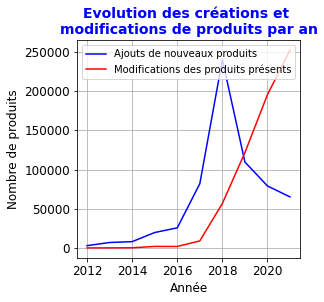

In [8]:
DF['created_datetime']= pd.to_datetime(DF['created_datetime']).values
DF['last_modified_datetime']= pd.to_datetime(DF['last_modified_datetime']).values
ajout_annnée = DF['code'].groupby(by=DF['created_datetime'].dt.year).nunique()
modif_annnée = DF['code'].groupby(by=DF['last_modified_datetime'].dt.year).nunique()

fig=plt.figure(figsize=(4,4))
plt.grid(True)
plt.plot(ajout_annnée,color='blue',label="Ajouts de nouveaux produits")
plt.plot(modif_annnée,color="red",label="Modifications des produits présents")

config_plt(plot = plt ,title = "Evolution des créations et \nmodifications de produits par an", 
           X_name = "Année" , Y_name =  "Nombre de produits" )
plt.show()

### 2.2 Analyse de la répartition des différents "scorings"
<p align="justify"><b>&emsp;&emsp;Il s'agit d'observer la répartion des différents "scoring" créées lors du nettoyage des données 

In [9]:
var_100g = DF.columns[DF.columns.str.contains('100g')==True]
print(var_100g)
var_scoring = DF.columns[DF.columns.str.contains('scoring')==True]
print(var_scoring)

Index(['saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'fat_100g',
       'carbohydrates_100g', 'salt_100g', 'energy-kcal_100g',
       'nutrition_score_100g', 'Nb_additifs_100g',
       'fruits_vegetables_nuts_\nestimate_from_ingredients_100g', 'fiber_100g',
       'nb_ingredients_100g'],
      dtype='object')
Index(['nova_group_scoring', 'nutriscore_scoring', 'Nb_ingrédients_scoring',
       'bio_scoring', 'additifs_scoring', 'ecolo_scoring'],
      dtype='object')


In [10]:
def plot_pie_bar(DF , var = var_scoring, Nb_cols = 4 ):
    Nb_row = var.shape[0]
    fig = plt.figure(figsize=(4*Nb_cols,4*Nb_row))
    k = 0
    for i in range(0,Nb_row):
        score = DF.groupby(by=DF[var[i]])[var[i]].count()
        X = score.index.values.astype(int)
        Y = score.values
        title = 'répartition du ' + str(var[i].replace('_scoring', '-score'))
        
        axes = fig.add_subplot(Nb_row,Nb_cols,k+1)
        axes.pie(score, labels =X, colors =c[(X-1)] , autopct ='%0.1f%%', textprops = dict(color='black',size = 12, weight = 'bold'))
        axes.set_title(title,fontdict=font_title)
        
        axes = fig.add_subplot(Nb_row,Nb_cols,k+2)
        axes.bar(X,Y,color=c[(X-1)])
        for j in X:
            j = int(j)
            axes.bar(X,Y,width=0,color= c[j-1],label= j)
        x , y , legend = 'score', 'Nombre de produit','score'
        config_plt(plot = 'None', ax = axes , title = title , X_name = x, Y_name = y , legend = legend)
        k+=2
    fig.tight_layout()
    plt.show() 


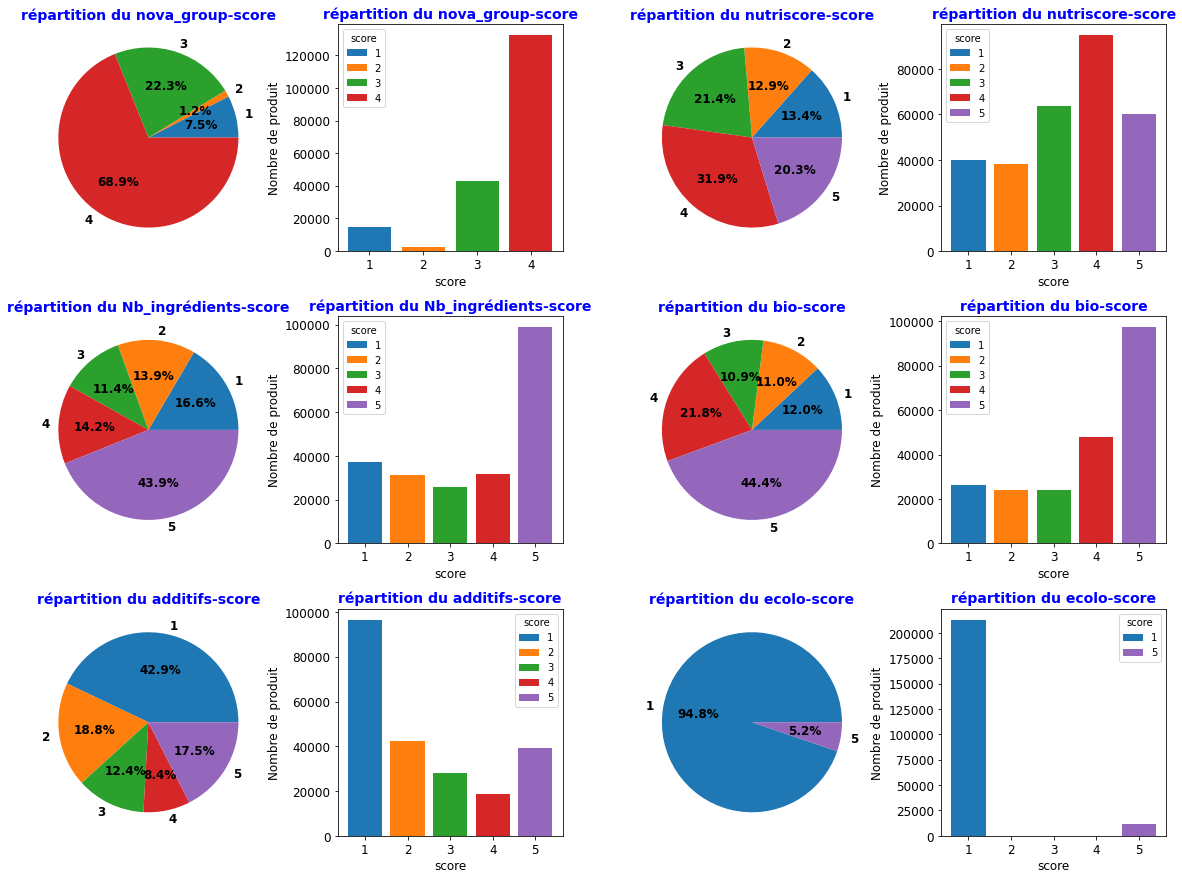

In [11]:
plot_pie_bar(DF)

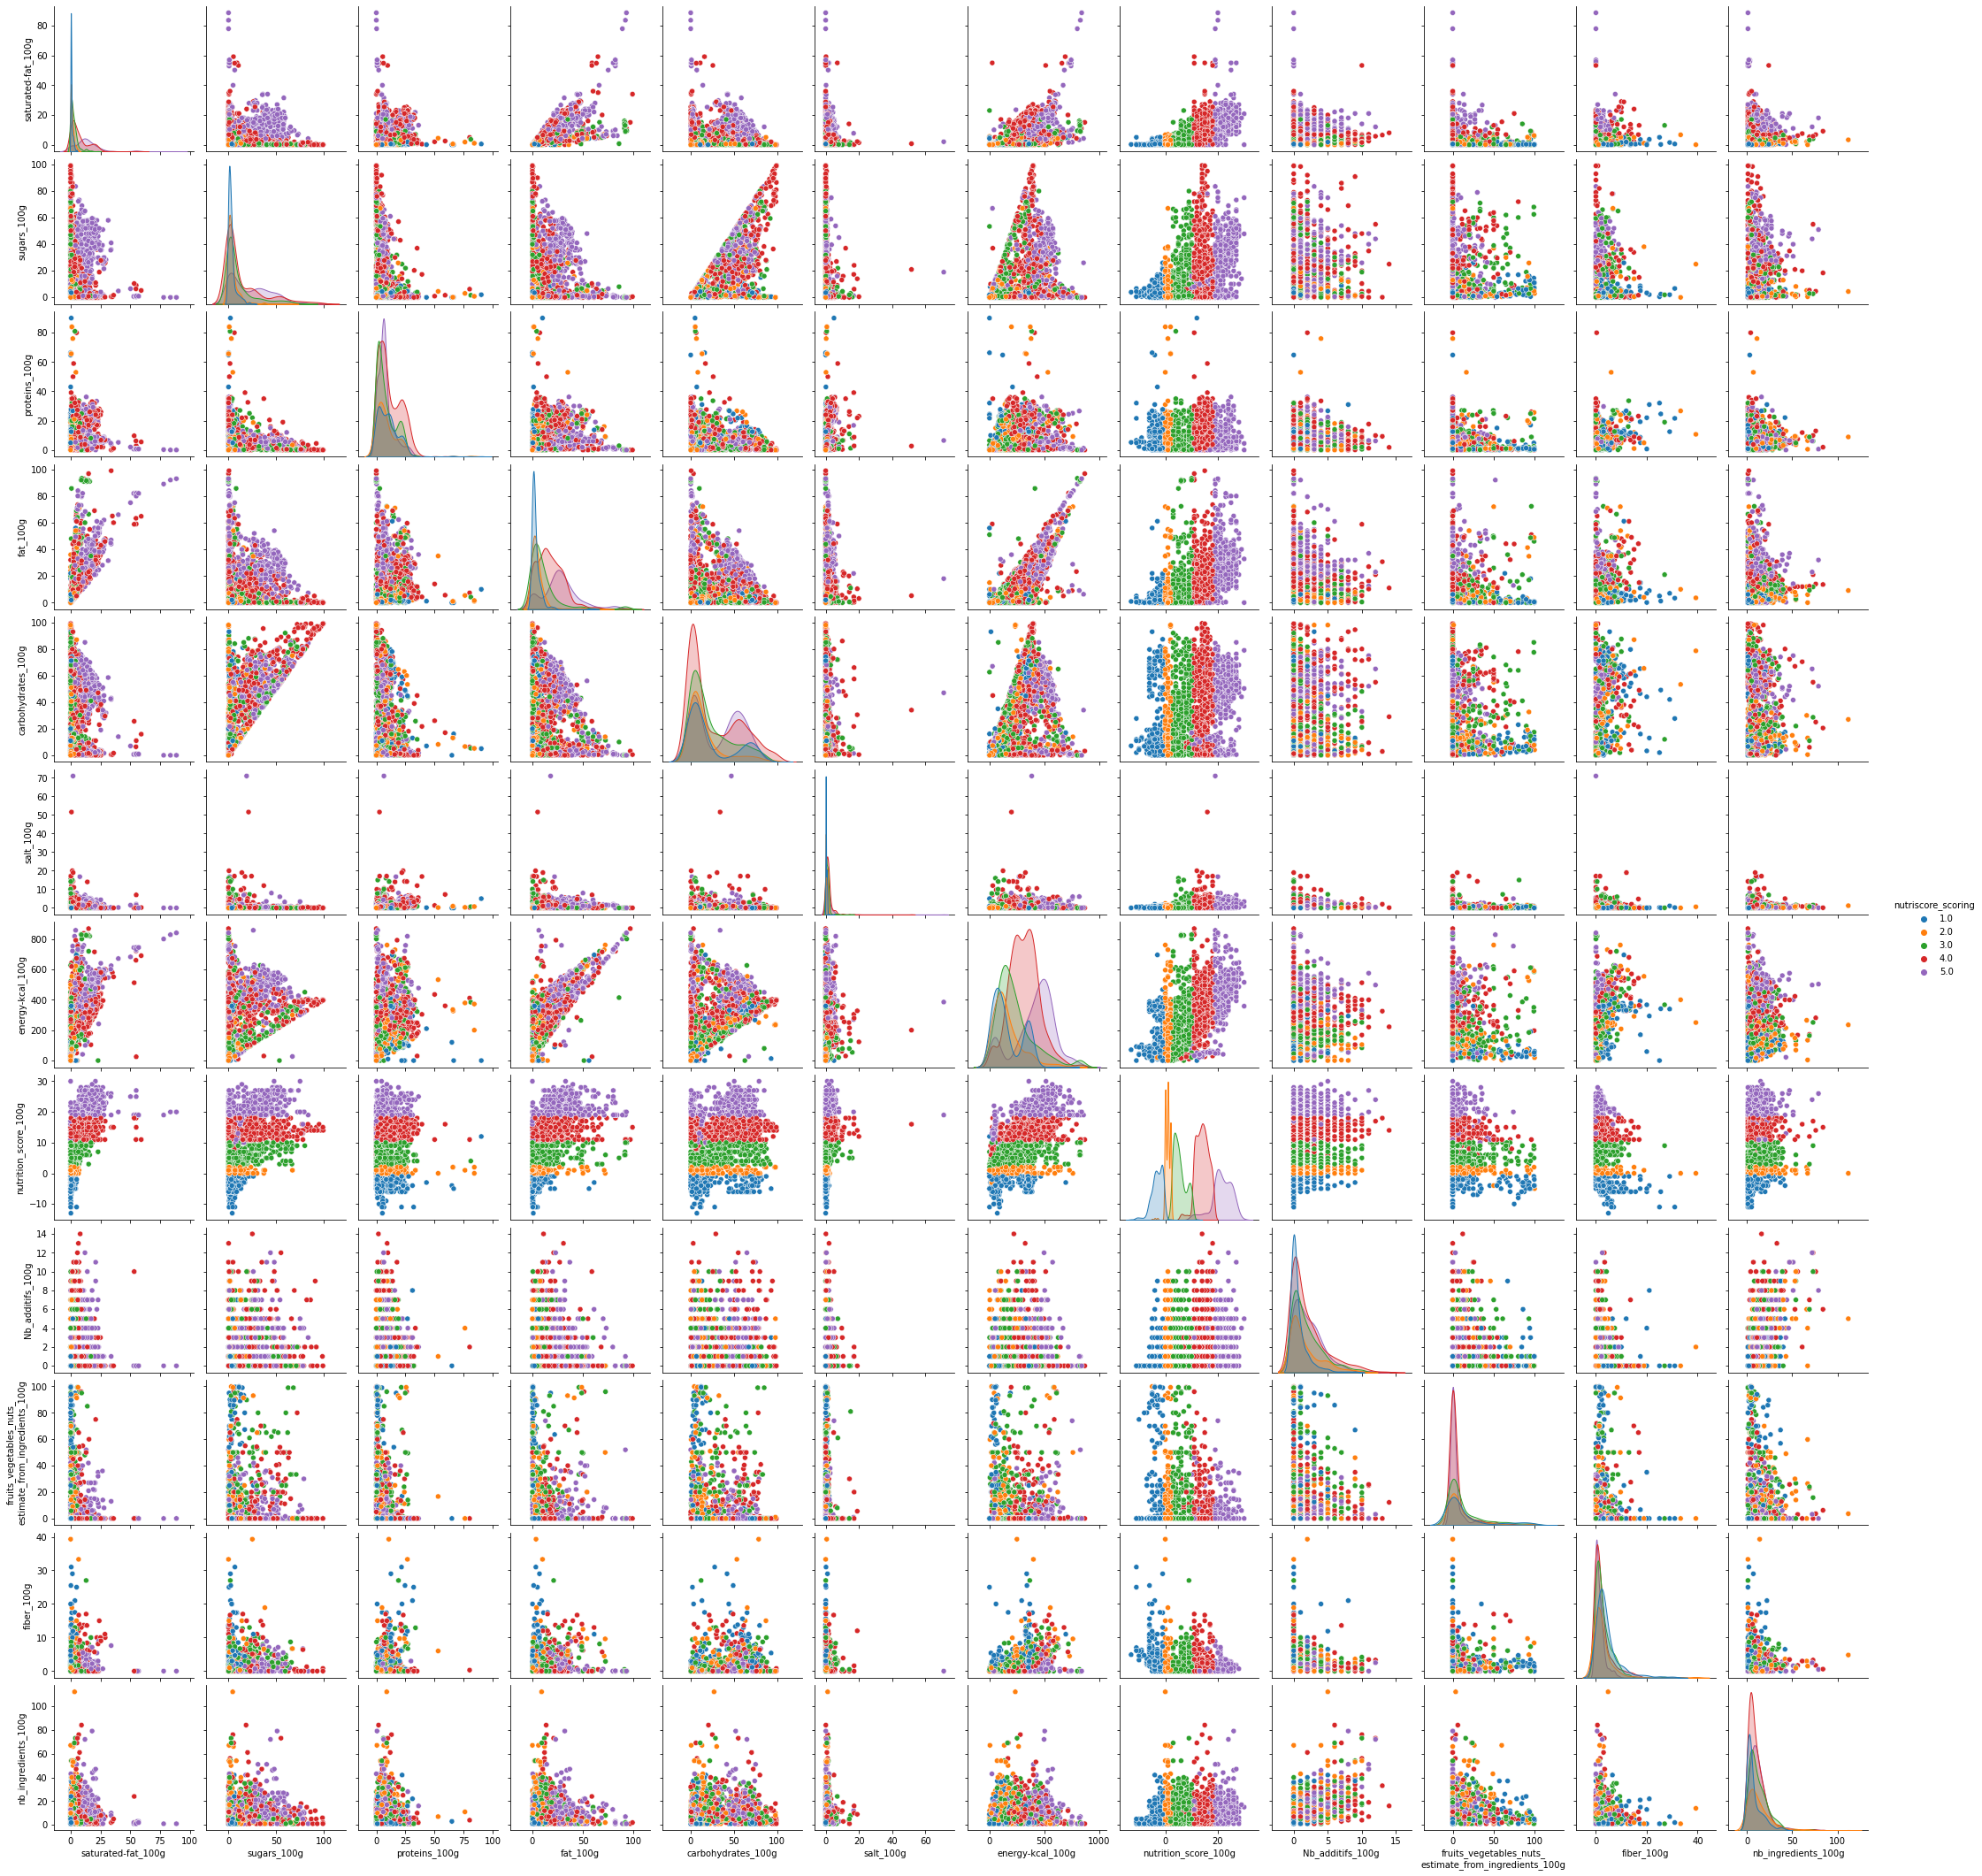

In [12]:
sns.pairplot(DF[var_100g.append(pd.Index(['nutriscore_scoring']))].sample(frac = 0.01),
             hue="nutriscore_scoring", palette = 'tab10')
plt.show()

On observe des corrélations linéaires entre certaines variables quantitatives.

### 2.3 Analyse uni-variée des variables quantitatives
<p align="justify"><b>&emsp;&emsp;Il s'agit d'observer la répartion des données quantitatives en fonction du nombre des produits alimentaires

In [13]:
def plot_hist(DF, cols='nutrition_score_100g' , grade=None ,categorie = None , Nb_cols=4 ):    
    if categorie != None: 
        var = DF.groupby(by=DF[categorie])[categorie].unique().index
    else : 
        var = cols
        
    if len(var[0]) == 1:
        var = var.split()
        Nb = 1
        Nb_row = 1
    else : 
        Nb = int(len(var))
        Nb_row = int(Nb/2+0.5)
        
    fig = plt.figure(figsize=(4*Nb_cols,4*Nb_row))
    for i in range(0,Nb): 
        indice = [0]
        if grade != None:
            indice = DF.groupby(by=DF[grade])[grade].unique().index

# Sélection des différentes variables
        k=0
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        for j in indice :
            if j == 0 :
                j = None
                
            if grade == None :
                DF_cols = DF[var[i]]
                bins = np.arange(DF[var[i]].min(),DF[var[i]].max(),1)
                title1 = 'répartition du '
                legend = None
            elif categorie == None:
                DF_cols = DF[DF[grade] == j][var[i]]
                bins = np.arange(DF[var[i]].min(),DF[var[i]].max()+1,0.5)
                title1 = 'répartition du '
                legend = 'score'
            else:
                DF_cols = DF[(DF[categorie]==var[i])&(DF[grade] == j)].sort_values(cols)
                DF_cols = DF_cols[cols]
                bins = np.arange(DF[cols].min(),DF[cols].max()+1,0.5)
                title1 = 'catégorie : '
                legend = 'score'
                
# Tracer des histogrammes
            if grade!= None :
                title2 = '\n en fonction de ' + str(grade if label.get(grade)==None else label.get(grade))
            else : 
                title2 = ''

            axes.hist(DF_cols,bins = bins,label = j, color = c[k], alpha = 0.75)
            title = title1 + str(var[i] if label.get(var[i])==None else label.get(var[i])) + title2
            if len(title)>50 & Nb_cols>3: 
                title_sep = title.split()
                Nb_mot = len(title_sep)
                title  = title.replace(title_sep[int(Nb_mot/2)],'\n'+title_sep[int(Nb_mot/2)])
            if categorie != None :
                x = str(cols if label.get(cols)==None else label.get(cols))
            else : 
                x = str(var[i] if label.get(var[i])==None else label.get(var[i]))
            y= 'Nombre de produit'
            config_plt(plot = 'None', ax = axes , title = title , X_name = x, Y_name = y , legend = legend)
            k+=1
    fig.tight_layout()
    plt.show()              

In [14]:
def plot_boxplot(DF, categorie, var , Nb_cols=2):
    if len(var[0]) == 1:
        var = var.split()
        Nb = 1
        Nb_row = 1
    else : 
        Nb = int(len(var))
        Nb_row = int(Nb/2+0.5)
        
    fig = plt.figure(figsize=(6*Nb_cols,5*Nb_row))
    for i in range(0,Nb):
        fig.add_subplot(Nb_row,Nb_cols,i+1)
        axes = sns.boxplot(data=DF, x=categorie, y=var[i])
        title = "Influence de la catégorie \ndu produit sur le Nutriscore"
        x = categorie
        y = str(var[i] if label.get(var[i])==None else label.get(var[i]))
        
        config_plt(plot = plt , title = title , X_name = x, Y_name = y , legend = None)
        plt.xticks(rotation = 90)
    fig.tight_layout()
    plt.show()

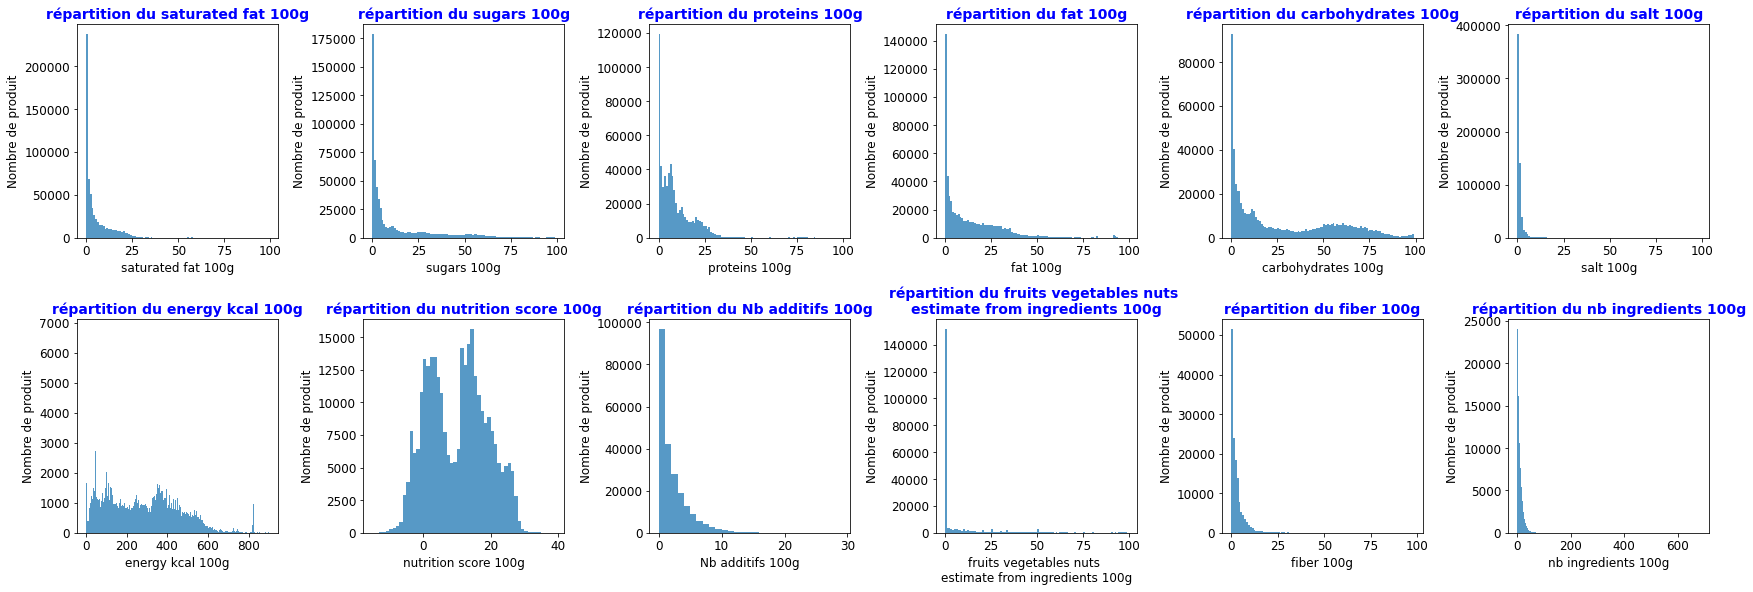

In [15]:
plot_hist(DF,cols=var_100g, Nb_cols = 6)

### 2.4 Analyse bi-variée des variables catégorielles en fonction du nutri-score 
<p align="justify"><b>&emsp;&emsp;Il s'agit d'observer les relations entre le calcul du nutrition-score, l'évaluation du "scoring" et les catégories de produits

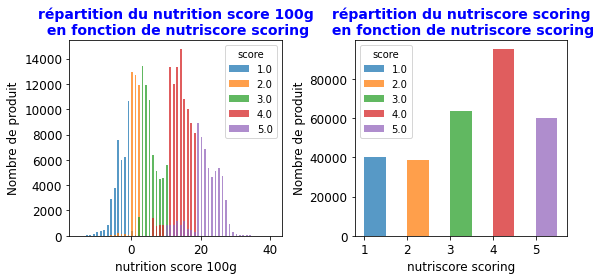

In [16]:
plot_hist(DF,cols=['nutrition_score_100g', 'nutriscore_scoring'], grade='nutriscore_scoring')

<font color = 'blue'><b> Variables quantitatives

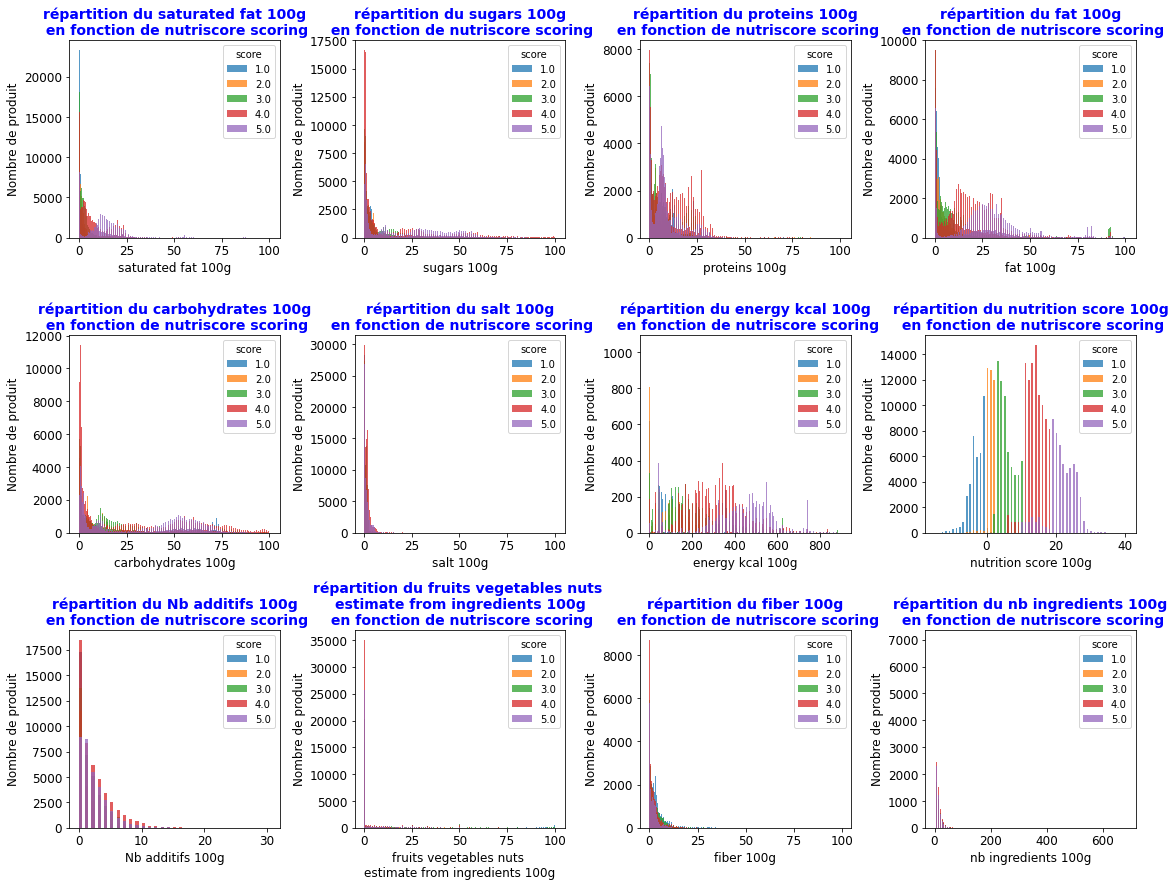

In [17]:
plot_hist(DF,cols=var_100g,grade='nutriscore_scoring')

<font color = 'blue'><b> Variables liées à la catégorie du produit

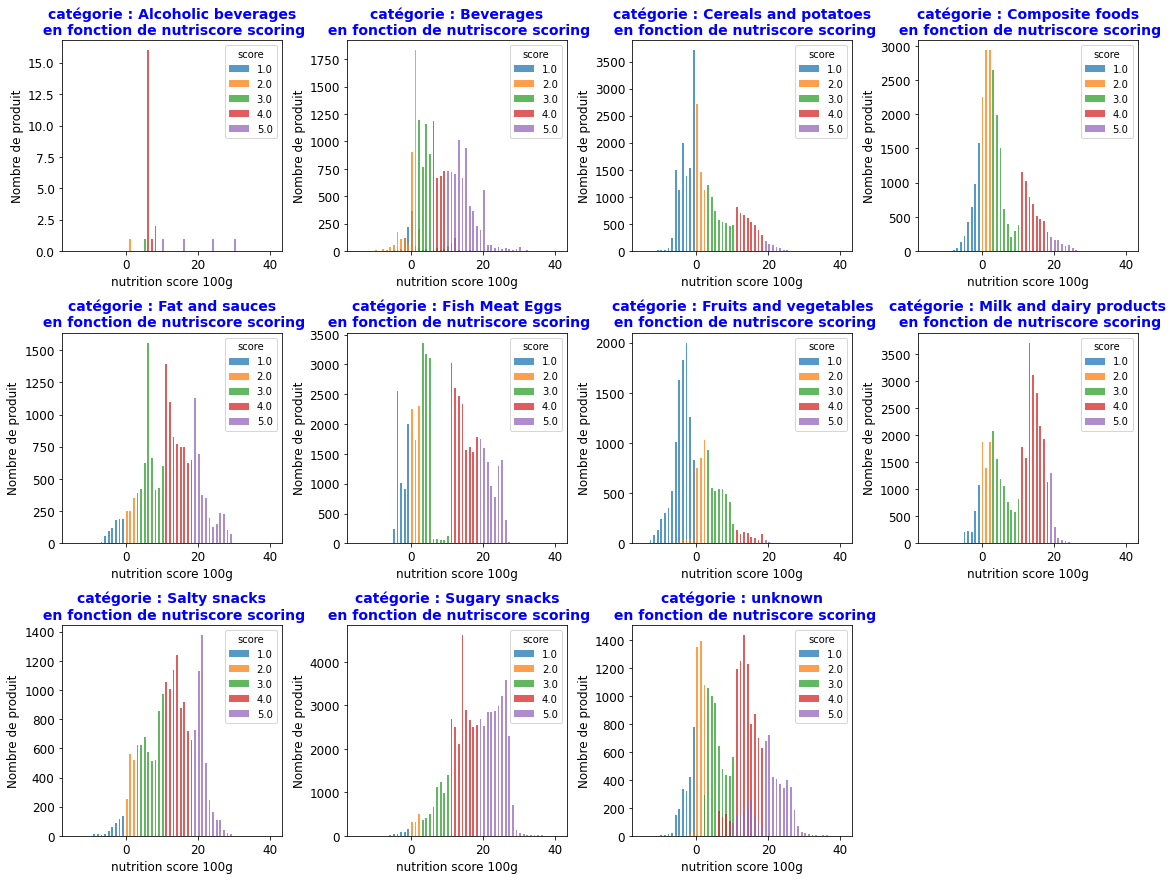

In [18]:
plot_hist(DF, cols='nutrition_score_100g' , grade='nutriscore_scoring',categorie = 'pnns_groups_1')

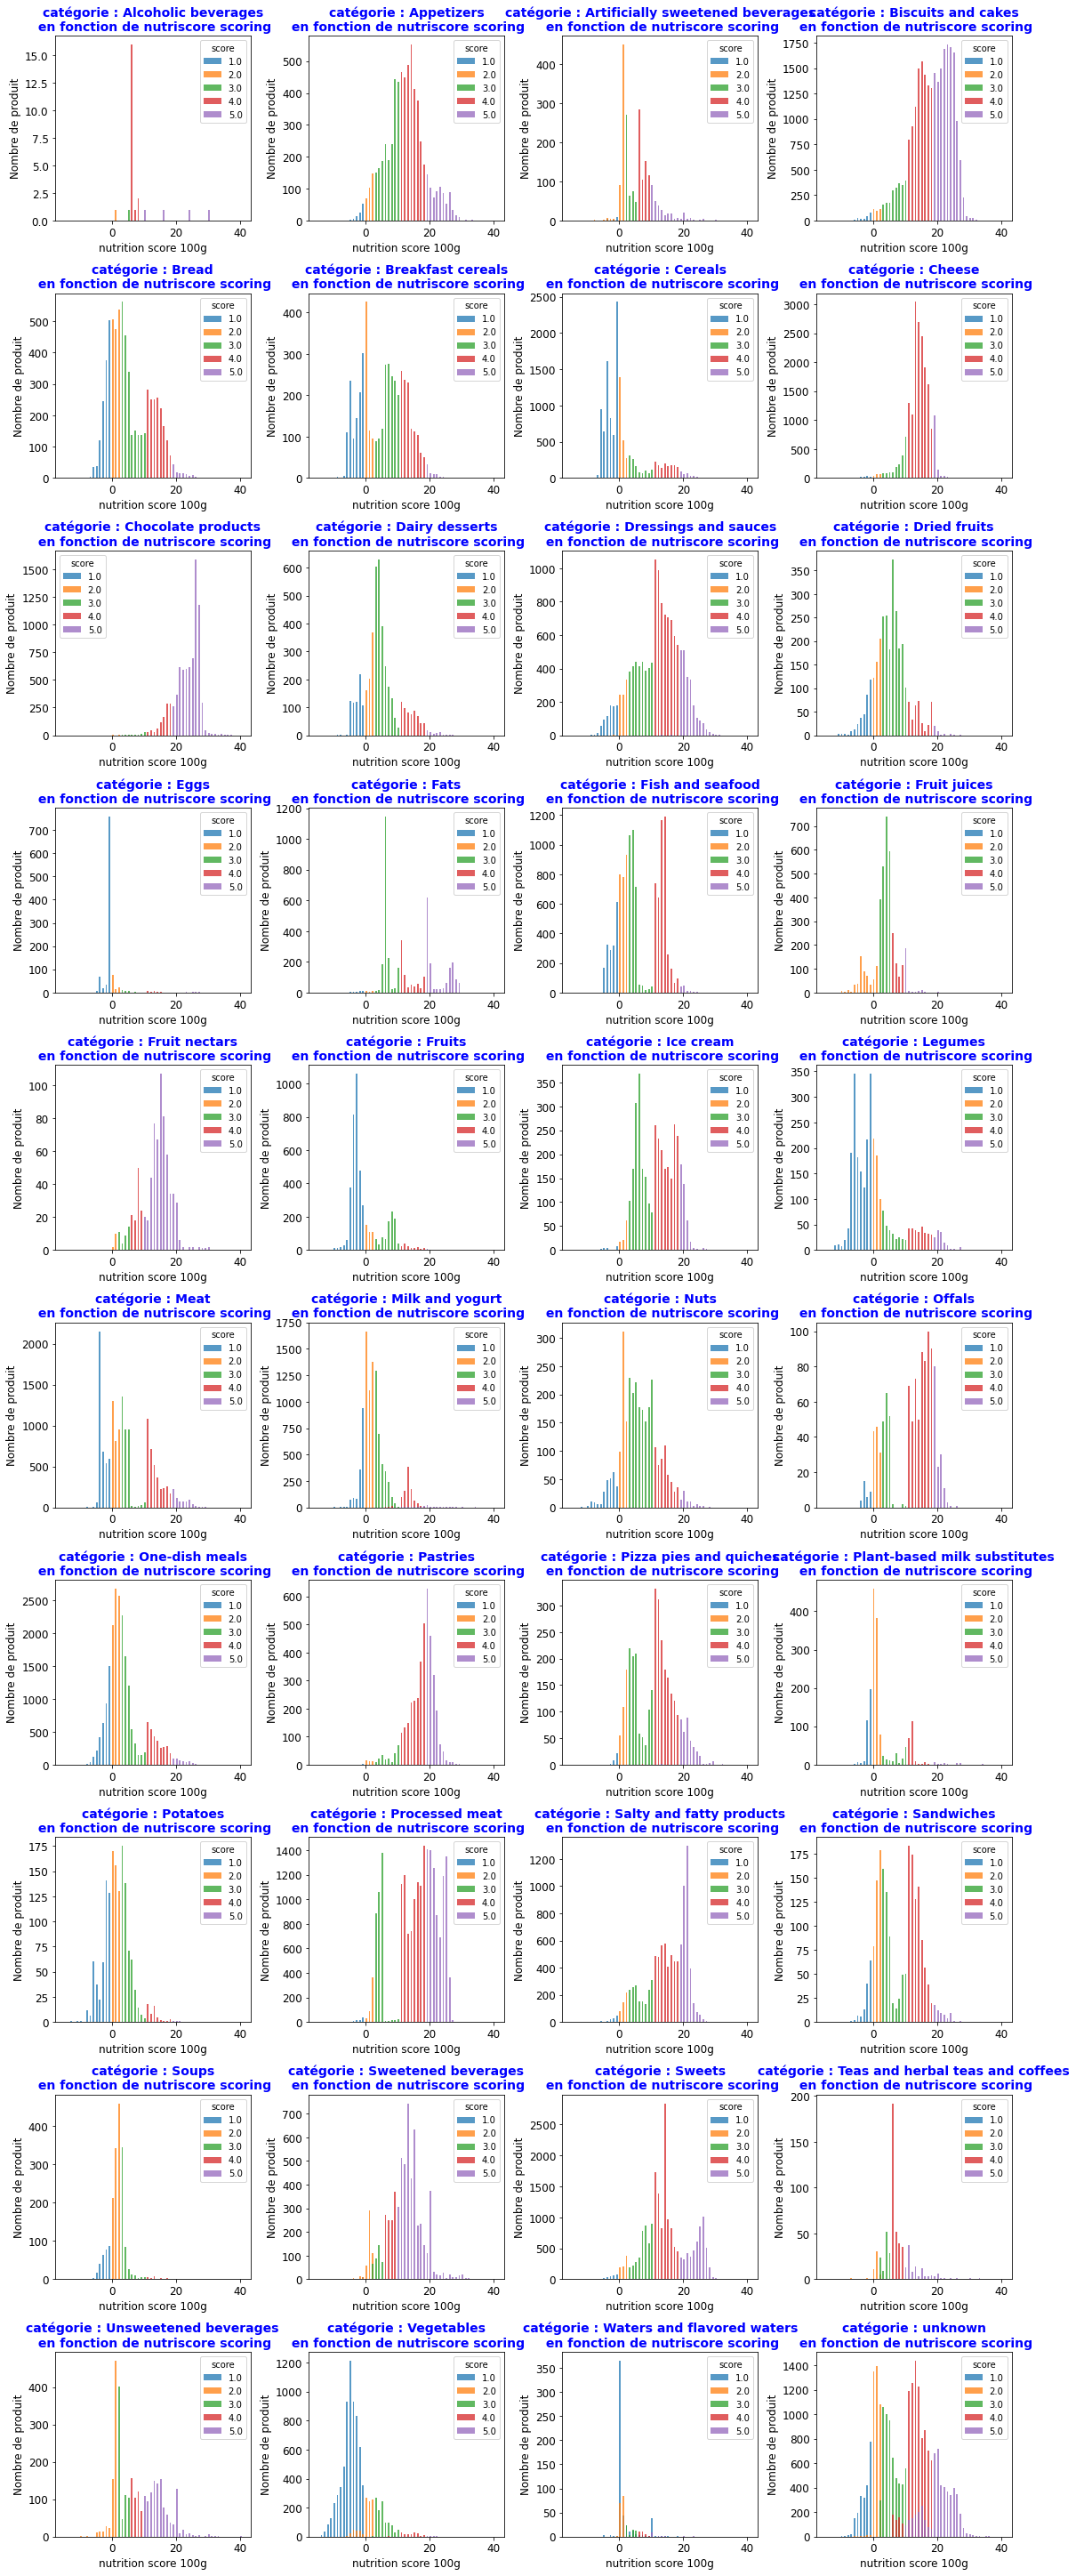

In [19]:
plot_hist(DF, cols='nutrition_score_100g' , grade='nutriscore_scoring',categorie = 'pnns_groups_2')

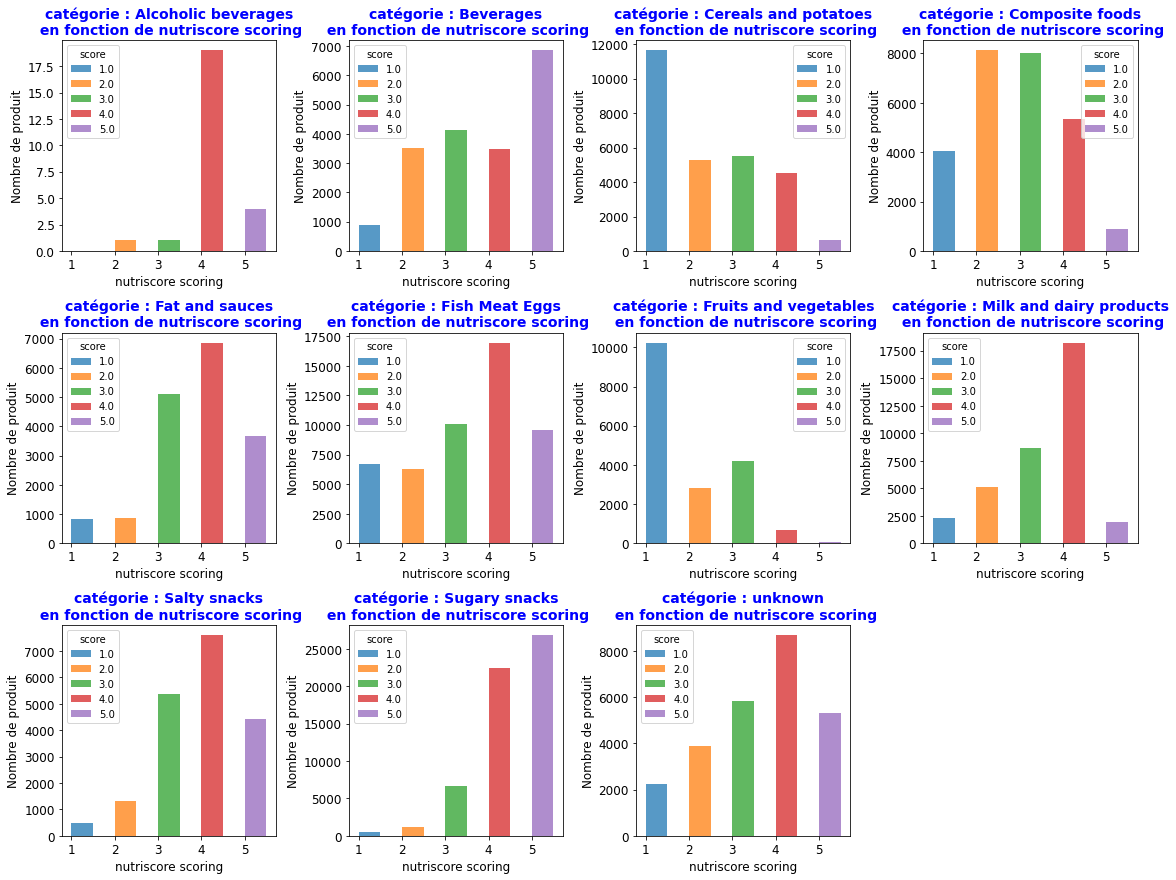

In [20]:
plot_hist(DF, cols='nutriscore_scoring' , grade='nutriscore_scoring',categorie = 'pnns_groups_1')

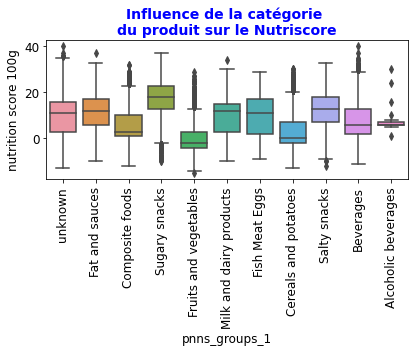

In [21]:
plot_boxplot(DF, 'pnns_groups_1','nutrition_score_100g', Nb_cols = 1)

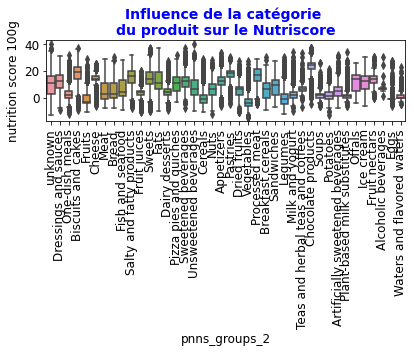

In [22]:
plot_boxplot(DF, 'pnns_groups_2','nutrition_score_100g', Nb_cols = 1)

In [23]:
anova_cat = smf.ols('nutrition_score_100g ~ pnns_groups_1', data=DF).fit()
print(anova_cat.summary())
sm.stats.anova_lm(anova_cat, typ=2)

                             OLS Regression Results                             
Dep. Variable:     nutrition_score_100g   R-squared:                       0.331
Model:                              OLS   Adj. R-squared:                  0.331
Method:                   Least Squares   F-statistic:                 1.473e+04
Date:                  Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                          13:24:52   Log-Likelihood:            -1.0069e+06
No. Observations:                297294   AIC:                         2.014e+06
Df Residuals:                    297283   BIC:                         2.014e+06
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

sum_sq        df             F  PR(>F)
pnns_groups_1  7.543344e+06      10.0  14729.804493     0.0
Residual       1.522429e+07  297283.0           NaN     NaN

In [24]:
anova_cat2 = smf.ols('nutrition_score_100g ~ pnns_groups_2', data=DF).fit()
print(anova_cat2.summary())
sm.stats.anova_lm(anova_cat2, typ=2)

                             OLS Regression Results                             
Dep. Variable:     nutrition_score_100g   R-squared:                       0.493
Model:                              OLS   Adj. R-squared:                  0.493
Method:                   Least Squares   F-statistic:                     7399.
Date:                  Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                          13:24:57   Log-Likelihood:            -9.6589e+05
No. Observations:                297294   AIC:                         1.932e+06
Df Residuals:                    297254   BIC:                         1.932e+06
Df Model:                            39                                         
Covariance Type:              nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

sum_sq        df            F  PR(>F)
pnns_groups_2  1.121470e+07      39.0  7398.749513     0.0
Residual       1.155293e+07  297254.0          NaN     NaN

Les résultats du test de Fisher indiquent une p-value inférieure à 5% pour la majorité des catégories. L'hypothèse selon laquelle les ditributions sont identiques peut être rejetée.
La catégorie du produit a donc bien une influence sur le nutri-score.

# Etape 3 : Analyse multivariée : Corrélation entre les données
<p align="justify"><b>&emsp;&emsp;Il s'agit d'observer les corrélations entre les différentes variables quantitatives et qualitatives 

In [25]:
def mat_cor(DF, var,sort_var):
    fig=plt.figure(figsize=(np.array(var).size/2,4))
    DF_mat_corr = DF[var].corr()
    DF_cols = DF_mat_corr[sort_var].sort_values(ascending = False).index
    mask = np.zeros_like(DF_mat_corr)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(DF_mat_corr.loc[DF_cols,DF_cols], mask = mask,cmap='coolwarm',annot=True, 
                     annot_kws={"size":8 ,'weight':'bold','color':'black'}) 
    
    title = "Coefficients de corrélation de Pearson"
    config_plt(plot = None , ax = ax , title = title , X_name = None , Y_name = None , legend = None)
    plt.show()

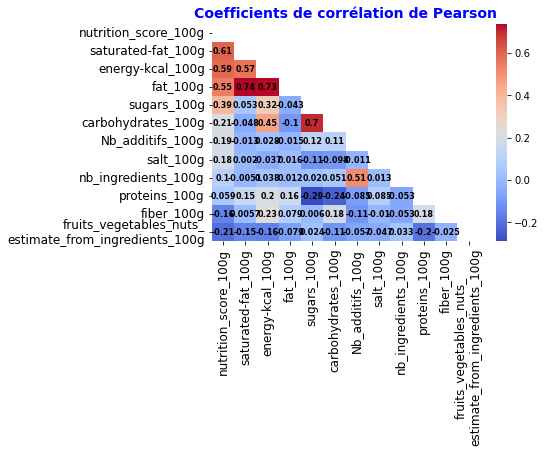

In [26]:
mat_cor(DF, var_100g , 'nutrition_score_100g')

Nous observons une forte corrélation entre le nutri-score et les variables "saturated_fat", "energy-kcal", "fat", "sugar". De plus on observe d'autres corrélations : carbohydrates - energy-kcal ; carbohydrates - sugar ; Nb_ingédients - Nb_additifs

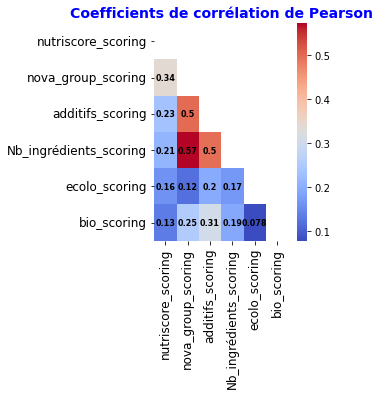

In [27]:
mat_cor(DF, var_scoring , 'nutriscore_scoring')

Le nova-group est un scoring prenant en compte la transformation des aliments, ce qui est confirmé par l'observation d'une forte correlation entre Nb_ingrédient - Nb_additifs - nova-group. 

# Etape 4 : Réduction dimensionnelle

In [28]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None, score_corr = None):
    Nb_row = len(axis_ranks)
#     fig=plt.figure(figsize=(4*Nb_row,4))
    
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(4,4))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables
            labels = [x.replace('_100g',' ').replace('-',' ') for x in labels]
            #labels = [ x.replace(x.split()[int(len(x.split())/2)] ,'\n'+ x.split()[int(len(x.split())/2)]) if len(x)>40 else x for x in labels]
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        pos_x = ['right' if x<0 else 'left'] 
                        pos_y = ['top' if y<0 else 'bottom']
                        plt.text(x, y, labels[i], fontsize='10', ha=pos_x[0], 
                                 va=pos_y[0], rotation=label_rotation, color="blue", alpha=0.5)
            
            # Affichage flèche score 
            if np.array(score_corr).all() != None :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   score_corr[d1], score_corr[d2], 
                   angles='xy', scale_units='xy', scale=1, color="red")
                plt.text(score_corr[d1], score_corr[d2], score_corr.name, fontsize='10',weight = 'bold', ha=pos_x[0], 
                                 va=pos_y[0], rotation=label_rotation, color="red", alpha=0.75)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            x_name = 'F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1))
            y_name = 'F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1))
            title = "Cercle des corrélations (F{} et F{})".format(d1+1, d2+1)
            legend = 'score'
            
            config_plt(plot = plt , ax = None , title = title , X_name = x_name , Y_name = y_name , legend = None)
            
        plt.show(block=False)
        

In [29]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    legend_color = illustrative_var.name
    
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(4,4))
            
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2],s=1,alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2],s=1, alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie 
            title = f"Projection des {X_projected.shape[0]} individus sur F{d1+1} et F{d2+1}\nColoration : {legend_color}"
            x_name = 'F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1))
            y_name = 'F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1))
            legend = 'score'
            
            config_plt(plot = plt , ax = None , title = title , X_name = x_name , Y_name = y_name , legend = legend)
            
            plt.show(block=False)

In [30]:
def display_scree_plot(pca):
    fig=plt.figure(figsize=(4,4))
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    x_name = "rang de l'axe d'inertie"
    y_name = "pourcentage d'inertie"
    title="Eboulis des valeurs propres"
    config_plt(plot = plt , ax = None , title = title , X_name = x_name , Y_name = y_name , legend = None)

    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )

    plt.show()

In [31]:
# choix du nombre de composantes à calculer
n_comp = len(var_100g) - 1

# préparation des données pour l'ACP
X = DF[var_100g].dropna()
features = DF[var_100g].columns
color_pop = DF.loc[X.index, "nutriscore_scoring"]

# Centrage et Réduction
# std_scale = preprocessing.StandardScaler().fit(X.values)
# X_scaled = std_scale.transform(X)
X_scaled = StandardScaler().fit_transform(X.values)

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)
# Projection des individus
X_projected = pca.fit_transform(X_scaled)

def calcul_corr(DF,X_projected, DF_index , var ) : 
    x_score = DF[var].loc[DF_index].values    
    score_corr = []
    for i in range(X_projected.shape[1]):
        corr = np.corrcoef(x_score,X_projected[:,i])
        score_corr.append(corr[0,1])
    score_corr.append(0)
    DF_score_corr = pd.Series(score_corr , name = var)
    return DF_score_corr

nutri_corr = calcul_corr(DF,X_projected, X.index, 'nutriscore_scoring')

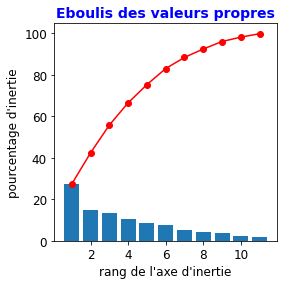

In [32]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [33]:
varexpl = pca.explained_variance_ratio_*100
print("Le 1er plan factoriel a une inertie de {:.2f}%, le 2nd plan : {:.2f}% et le 3e plan : {:.2f}% ".format(varexpl[0:2].sum(),varexpl[0:4].sum(),varexpl[0:6].sum() ))

Le 1er plan factoriel a une inertie de 42.36%, le 2nd plan : 66.49% et le 3e plan : 83.00% 


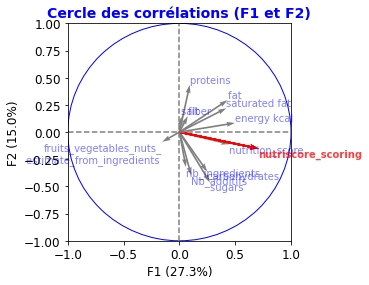

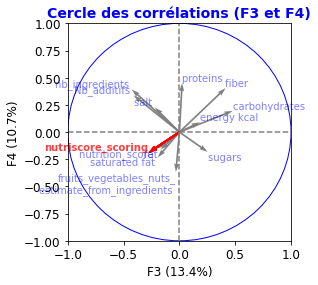

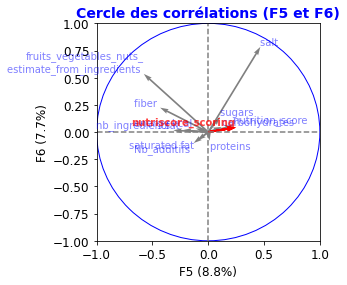

In [34]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)],labels = np.array(features) , score_corr = nutri_corr )

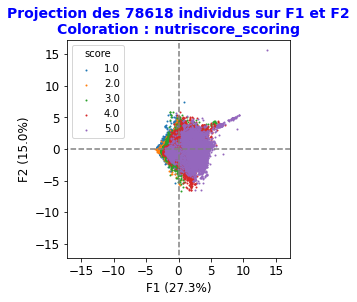

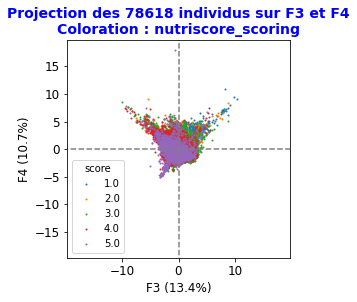

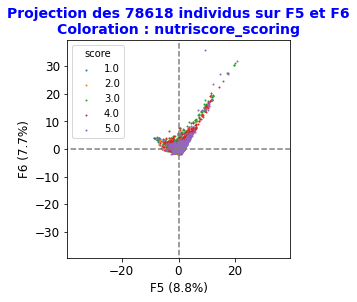

In [35]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],labels=None,illustrative_var=color_pop ,alpha = 1)
plt.show()

# Etape 4 : Analyse des produits

On définit un nouveau dataframe qui contient uniquement les variables de scoring les plus pertinentes, et qui n'ont pas de valeurs NA.

In [36]:
DF_score_important = DF[['code', 'product_name','pnns_groups_1','pnns_groups_2','nutriscore_scoring','nova_group_scoring','bio_scoring', 
                         'additifs_scoring', 'Nb_ingrédients_scoring']]
DF_score_important = DF_score_important.dropna()

In [37]:
DF_select_score = DF_score_important[((DF_score_important['nutriscore_scoring']==1) | (DF_score_important['nutriscore_scoring'] == 2)) 
                                     & (DF_score_important['nova_group_scoring']==1) & (DF_score_important['bio_scoring']==1)]

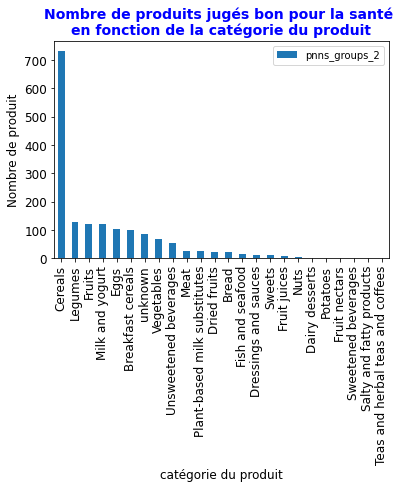

In [38]:
DF_select_score['pnns_groups_2'].value_counts().plot(kind='bar')
x , y = 'catégorie du produit', 'Nombre de produit'
title = 'Nombre de produits jugés bon pour la santé \nen fonction de la catégorie du produit'
config_plt(plot = plt, ax = None , title = title , X_name = x, Y_name = y)
plt.show()

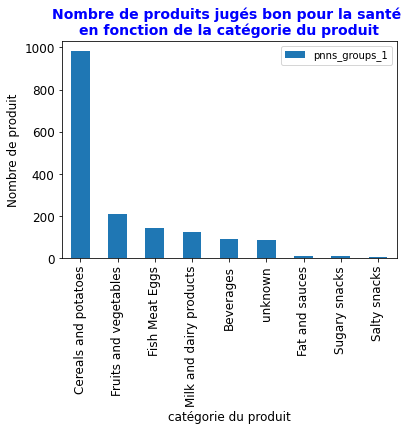

In [39]:
DF_select_score['pnns_groups_1'].value_counts().plot(kind='bar')
x , y = 'catégorie du produit', 'Nombre de produit'
title = 'Nombre de produits jugés bon pour la santé \nen fonction de la catégorie du produit'
config_plt(plot = plt, ax = None , title = title , X_name = x, Y_name = y)
plt.show()